<a href="https://colab.research.google.com/gist/BhavitaP03/341acbe8cbd624e801fe37432149da08/sih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

In [31]:
train_data_dir = '/content/drive/MyDrive/practice/train'
validation_data_dir = '/content/drive/MyDrive/practice/validate'
test_data_dir = '/content/drive/MyDrive/practice/test'



In [32]:
img_width, img_height = 150, 150
batch_size = 32


In [33]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generators for training and testing
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # Two classes: cats and dogs
)


Found 658 images belonging to 2 classes.


In [34]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [35]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'  # Two classes: cats and dogs
)


Found 264 images belonging to 2 classes.


In [36]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (cats or dogs)
])


In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [38]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
20/20 [==============================] - 237s 12s/step - loss: 0.7858 - accuracy: 0.5990 - val_loss: 0.5216 - val_accuracy: 0.7383
Epoch 2/10
20/20 [==============================] - 36s 2s/step - loss: 0.5192 - accuracy: 0.7476 - val_loss: 0.5041 - val_accuracy: 0.7656
Epoch 3/10
20/20 [==============================] - 38s 2s/step - loss: 0.4765 - accuracy: 0.7812 - val_loss: 0.5291 - val_accuracy: 0.7539
Epoch 4/10
20/20 [==============================] - 37s 2s/step - loss: 0.4643 - accuracy: 0.7796 - val_loss: 0.6167 - val_accuracy: 0.7070
Epoch 5/10
20/20 [==============================] - 39s 2s/step - loss: 0.4309 - accuracy: 0.7955 - val_loss: 0.4682 - val_accuracy: 0.7852
Epoch 6/10
20/20 [==============================] - 38s 2s/step - loss: 0.4272 - accuracy: 0.8031 - val_loss: 0.4745 - val_accuracy: 0.7695
Epoch 7/10
20/20 [==============================] - 36s 2s/step - loss: 0.4347 - accuracy: 0.7875 - val_loss: 0.4742 - val_accuracy: 0.7852
Epoch 8/10
20/20 [

In [39]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

8/8 [==============================] - 3s 401ms/step - loss: 0.4545 - accuracy: 0.7617
Test loss: 0.45450353622436523, Test accuracy: 0.76171875


In [55]:
new_image_path = '/content/download.jpeg'

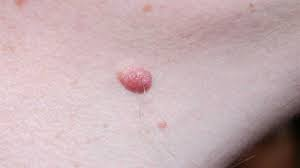

In [68]:
from IPython.display import Image, display

image_path = '/content/download.jpeg'
display(Image(filename=image_path))

In [59]:
input_size = (150, 150)  # Adjust this to match the input size of your model
img = image.load_img(new_image_path, target_size=input_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.0  # Normalize pixel values to the range [0, 1]


In [61]:
predictions = model.predict(img)

1/1 [==============================] - 0s 42ms/step


In [62]:
class_labels = ['melanoma', 'nevus']

In [63]:
predicted_class = class_labels[int(round(predictions[0][0]))]

In [64]:
print(f'Predicted class: {predicted_class}')
print(f'Class probabilities: {predictions}')

Predicted class: nevus
Class probabilities: [[0.9526182]]
